<a href="https://colab.research.google.com/github/Vishaal-git/ISI-Internship-Project/blob/main/PARKINSONS_CLASSIFICATION_USING_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
df = pd.read_csv('parkinsons.data')

In [ ]:
X = df.drop(columns=['name', 'status'], axis=1)
Y = df['status']
print("Features (X) shape:", X.shape)
print("Target (Y) shape:", Y.shape)
print("-" * 50)

Features (X) shape: (195, 22)
Target (Y) shape: (195,)
--------------------------------------------------


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("Shapes of the splits:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"Y_test:  {Y_test.shape}")
print("-" * 50)

Shapes of the splits:
X_train: (156, 22)
X_test:  (39, 22)
Y_train: (156,)
Y_test:  (39,)
--------------------------------------------------


In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

print("Data standardization complete.")
print("-" * 50)

Data standardization complete.
--------------------------------------------------


In [ ]:
print("Class distribution before SMOTE:")
print(pd.Series(Y_train).value_counts())
print("-" * 50)
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
print("Class distribution after SMOTE:")
print(pd.Series(Y_train_resampled).value_counts())
print("-" * 50)

Class distribution before SMOTE:
status
1    116
0     40
Name: count, dtype: int64
--------------------------------------------------
Class distribution after SMOTE:
status
1    116
0    116
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
model_LR = LogisticRegression(max_iter=1000000) # Increased iterations for robustness
model_LR.fit(X_train_resampled, Y_train_resampled)

print("Logistic Regression model trained successfully on resampled data.")
print("-" * 50)

Logistic Regression model trained successfully on resampled data.
--------------------------------------------------


In [ ]:
prediction1 = model_LR.predict(X_test)
accuracy = accuracy_score(Y_test, prediction1)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print("-" * 50)
print("Classification Report:")
print(classification_report(Y_test, prediction1, zero_division=0))
print("-" * 50)
cm = confusion_matrix(Y_test, prediction1)
class_labels = np.unique(Y)

print("Confusion Matrix:")
print(cm)
print("-" * 50)

Accuracy Score: 66.67%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.75      0.48         8
           1       0.91      0.65      0.75        31

    accuracy                           0.67        39
   macro avg       0.63      0.70      0.62        39
weighted avg       0.80      0.67      0.70        39

--------------------------------------------------
Confusion Matrix:
[[ 6  2]
 [11 20]]
--------------------------------------------------


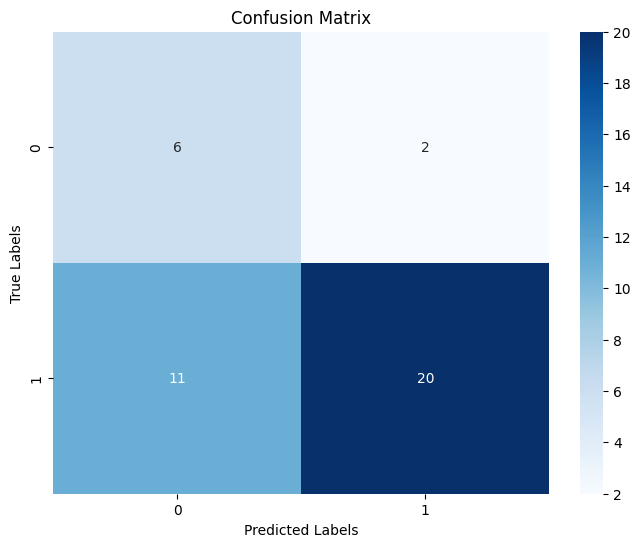

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()